# Calculating the Harmonic Ensemble Similarity between ensembles

Here we compare the conformational ensembles of proteins in four trajectories, using the harmonic ensemble similarity method.

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.21.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests


**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)


<div class="alert alert-info">
    
**Note**

The metrics and methods in the `encore` module are from (<a data-cite="tiberti_encore_2015" href="https://doi.org/10.1371/journal.pcbi.1004415">Tiberti *et al.*, 2015</a>). Please cite them when using the ``MDAnalysis.analysis.encore`` module in published work.

</div>

In [2]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import (PSF, DCD, DCD2, GRO, XTC, 
                                        PSF_NAMD_GBIS, DCD_NAMD_GBIS,
                                        PDB_small, CRD)
from MDAnalysis.analysis import encore

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (#beckstein_zipping_2009)

In [3]:
u1 = mda.Universe(PSF, DCD)
u2 = mda.Universe(PSF, DCD2)
u3 = mda.Universe(GRO, XTC)
u4 = mda.Universe(PSF_NAMD_GBIS, DCD_NAMD_GBIS)

labels = ['DCD', 'DCD2', 'XTC', 'NAMD']

The trajectories can have different lengths, as seen below.

In [4]:
print(len(u1.trajectory), len(u2.trajectory), len(u3.trajectory))

98 102 10


## Calculating harmonic similarity

The harmonic ensemble similarity method treats the conformational ensemble within each trajectory as a high-dimensional Gaussian distribution $N(\mu, \Sigma)$. The mean $\mu$ is estimated as the average over the ensemble. The covariance matrix $\Sigma$ is calculated either using a shrinkage estimator (`cov_estimator='shrinkage'`) or a maximum-likelihood method (`cov_estimator='ml'`).

The harmonic ensemble similarity is then calculated using the symmetrised version of the Kullback-Leibler divergence. This has no upper bound, so you can get some very high values for very different ensembles.

It is recommended that you align your trajectories before computing the harmonic similarity. You can either do this yourself with `align.AlignTraj`, or pass `align=True` into `encore.hes`. The latter option will align each of your Universes to the current timestep of the first Universe. Note that since `encore.hes` will pull your trajectories into memory, this changes the positions of your Universes.

In [5]:
hes, details = encore.hes([u1, u2, u3, u4],
                         selection='backbone',
                         align=True,
                         cov_estimator='shrinkage',
                         weights='mass')

In [6]:
hes

array([[      0.        ,   24955.71870601, 1879874.4652541 ,
         145622.25409916],
       [  24955.71870601,       0.        , 1659867.54594567,
         161102.33620648],
       [1879874.4652541 , 1659867.54594567,       0.        ,
        9900092.71845526],
       [ 145622.25409916,  161102.33620648, 9900092.71845526,
              0.        ]])

The mean and covariance matrices for each Universe are saved in `details`. 

### Plotting

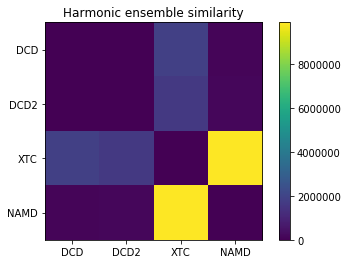

In [8]:
fig, ax = plt.subplots()
im = plt.imshow(hes)
plt.xticks(np.arange(4), labels)
plt.yticks(np.arange(4), labels)
plt.title('Harmonic ensemble similarity')
cbar = fig.colorbar(im)

## References

[1] R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, doi: [10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2] N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, [doi:10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3] ENCORE: Software for Quantitative Ensemble Comparison. Matteo Tiberti, Elena Papaleo, Tone Bengtsen, Wouter Boomsma, Kresten Lindorff-Larsen. *PLoS Comput Biol.* 2015, 11, e1004415.

[4] Beckstein O, Denning EJ, Perilla JR, Woolf TB. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)
